In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data', index_col=0)

In [3]:
# no previous info about the data
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
# In Knn, wehere feature distances are important to define the target
# The standardization of the the data is important, 
# otherwise huge values can have much affect on the classification
# variables measured at different scales do not contribute equally to the analysis

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
# actual standardization performed
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [10]:
# except last column
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [11]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
# Now data is ready, preprocessed and standardized
# Lets train and then make predictions

In [14]:
from sklearn.cross_validation import train_test_split

In [15]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [19]:
pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [23]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [30]:
a1 = np.array([1,0,0,1,1,0,0,1,0,1])
b1 = np.array([1,0,0,1,1,0,0,0,1,0])
print((a1 != b1))
print(np.mean(a1 != b1))

[False False False False False False False  True  True  True]
0.3


In [31]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

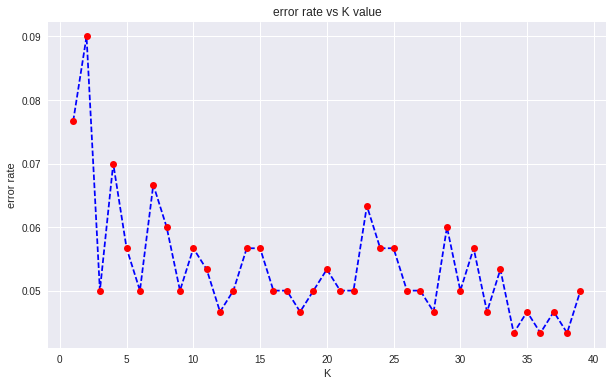

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', 
         linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('error rate vs K value')
plt.xlabel('K')
plt.ylabel('error rate')

In [35]:
knn17 = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[151   8]
 [  7 134]]
             precision    recall  f1-score   support

          0       0.96      0.95      0.95       159
          1       0.94      0.95      0.95       141

avg / total       0.95      0.95      0.95       300

